## 01. Netflix Movie Recommendation System: Collaborative_Filtering

- Business Understanding <br><br>
Netflix 영화 추천 시스템_협업 필터링 <br>
유저들의 평점 간 유사성으로 영화 추천 

- Data Understanding

1. Data Load

> Movie.csv

In [2]:
import pandas as pd
movie_df = pd.read_csv('data/Netflix_Dataset_Movie.csv')
movie_df.head()

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_ID  17770 non-null  int64 
 1   Year      17770 non-null  int64 
 2   Name      17770 non-null  object
dtypes: int64(2), object(1)
memory usage: 416.6+ KB


> Rating.csv

In [4]:
rating_df = pd.read_csv('data/Netflix_Dataset_Rating.csv')
rating_df.head()

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3


In [5]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17337458 entries, 0 to 17337457
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   User_ID   int64
 1   Rating    int64
 2   Movie_ID  int64
dtypes: int64(3)
memory usage: 396.8 MB


2. EDA

In [5]:
# Merge
df = movie_df.merge(rating_df, how='inner', on='Movie_ID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17337458 entries, 0 to 17337457
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Movie_ID  int64 
 1   Year      int64 
 2   Name      object
 3   User_ID   int64 
 4   Rating    int64 
dtypes: int64(4), object(1)
memory usage: 793.6+ MB


In [7]:
df

,Movie_ID,Year,Name,User_ID,Rating
0,3,1997,Character,712664,5
1,3,1997,Character,1331154,4
2,3,1997,Character,2632461,3
3,3,1997,Character,44937,5
4,3,1997,Character,656399,4
...,...,...,...,...,...
17337453,4496,1993,Farewell My Concubine,520675,3
17337454,4496,1993,Farewell My Concubine,1055714,5
17337455,4496,1993,Farewell My Concubine,2643029,4
17337456,4496,1993,Farewell My Concubine,1559566,3


In [8]:
df.isnull().sum()

Movie_ID    0
Year        0
Name        0
User_ID     0
Rating      0
dtype: int64

In [9]:
df['Movie_ID'].nunique()

1350

In [10]:
df['User_ID'].nunique()

143458

In [11]:
df['Rating'].value_counts()

4    5901368
3    5185650
5    3769803
2    1759281
1     721356
Name: Rating, dtype: int64

([], [])

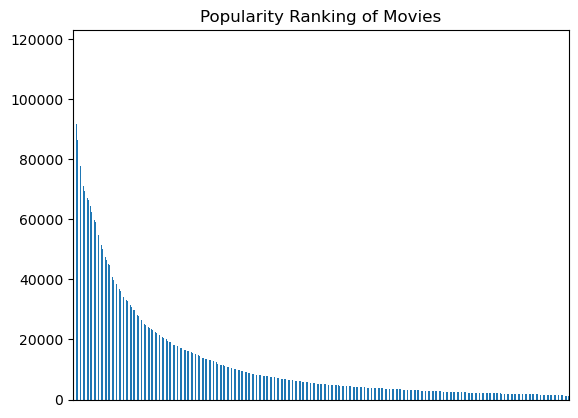

In [6]:
# 하나의 영화에 많은 리뷰
import matplotlib.pyplot as plt
plt.title("Popularity Ranking of Movies")
df.Movie_ID.value_counts().plot(kind = "bar")
plt.xticks(ticks = [])

In [7]:
df.to_csv('data/cf_df.csv', index=False)

In [8]:
df.shape

(17337458, 5)

In [15]:
df

,Movie_ID,Year,Name,User_ID,Rating
0,3,1997,Character,712664,5
1,3,1997,Character,1331154,4
2,3,1997,Character,2632461,3
3,3,1997,Character,44937,5
4,3,1997,Character,656399,4
...,...,...,...,...,...
17337453,4496,1993,Farewell My Concubine,520675,3
17337454,4496,1993,Farewell My Concubine,1055714,5
17337455,4496,1993,Farewell My Concubine,2643029,4
17337456,4496,1993,Farewell My Concubine,1559566,3


- Data Preparation

In [9]:
movie_pivot = df.pivot_table(index='Movie_ID', columns='User_ID', values='Rating')
movie_pivot.shape

(1350, 143458)

In [10]:
movie_pivot.head()

User_ID,6,7,79,97,134,169,183,188,195,199,...,2649308,2649328,2649331,2649335,2649336,2649370,2649378,2649388,2649426,2649429
Movie_ID,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
movie_pivot.fillna(0, inplace=True)
movie_pivot = movie_pivot.astype('int8')
movie_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 3 to 4496
Columns: 143458 entries, 6 to 2649429
dtypes: int8(143458)
memory usage: 184.7 MB


In [12]:
movie_pivot.head()

User_ID,6,7,79,97,134,169,183,188,195,199,...,2649308,2649328,2649331,2649335,2649336,2649370,2649378,2649388,2649426,2649429
Movie_ID,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
18,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0


In [13]:
movie_pivot.shape

(1350, 143458)

- Modeling

In [78]:
from sklearn.neighbors import NearestNeighbors
n_neighbors = 11
KNN = NearestNeighbors(metric='cosine', n_neighbors=n_neighbors, n_jobs=-1)
KNN.fit(movie_pivot)
distances, indices = KNN.kneighbors(movie_pivot)

In [79]:
import pickle 
with open('data/distances.pickle','wb') as fw:
    pickle.dump(distances, fw)

In [84]:
with open('data/indices.pickle','wb') as fw:
    pickle.dump(indices, fw)

In [85]:
with open('data/movie_pivot.pickle','wb') as fw:
    pickle.dump(movie_pivot, fw)

In [16]:
import numpy
import sklearn
print(f'numpy version: {numpy.__version__}')
print(f'sklearn version: {sklearn.__version__}')
print('python version: 3.10.9')

numpy version: 1.23.5
sklearn version: 1.2.1
python version: 3.10.9


In [20]:
import pickle 
with open('data/distances.pickle', 'rb') as f: 
    distances = pickle.load(f)
distances.shape

(1350, 11)

In [21]:
with open('data/indices.pickle', 'rb') as f: 
    indices = pickle.load(f)
indices.shape

(1350, 11)

In [22]:
with open('data/movie_pivot.pickle', 'rb') as f: 
    movie_pivot = pickle.load(f)
movie_pivot.shape

(1350, 143458)

- Evaluation

In [23]:
df.Movie_ID.value_counts()

1905    117075
2452    102721
4306    102376
571     101450
3860     98545
         ...  
4161      1215
1375      1213
717       1212
2870      1092
4238      1042
Name: Movie_ID, Length: 1350, dtype: int64

In [24]:
movie_df[movie_df['Movie_ID'] == 1905]
# Pirates of the Caribbean: The Curse of the Black Pearl

,Movie_ID,Year,Name
1904,1905,2003,Pirates of the Caribbean: The Curse of the Bla...


In [25]:
# Pirates of the Caribbean: The Curse of the Black Pearl의 인덱스
import numpy as np
np.where(movie_pivot.index == 1905)

# 587

(array([587], dtype=int64),)

In [26]:
indices.shape

(1350, 11)

In [27]:
# 587 번째의 Movie_ID 거리가 가장 가까운 Movie_ID (Top 10)
indices[587]

array([ 587,  746, 1199, 1162, 1191, 1291, 1331,  837, 1096,  857,  719],
      dtype=int64)

In [28]:
distances[587] # Cosine 거리고 계산됨 (1 - Cosine Similarity 된 것으로 보임)

array([6.66133815e-16, 1.79874423e-01, 2.09585734e-01, 2.17133352e-01,
       2.17409892e-01, 2.18407420e-01, 2.31897662e-01, 2.43899703e-01,
       2.52276552e-01, 2.61663902e-01, 2.62949643e-01])

- Deployment

In [29]:
n_neighbors = 11
for i in range(n_neighbors):
    movie_name = movie_df.loc[movie_df['Movie_ID'] == movie_pivot.index[indices[587][i]], 'Name'].values[0]
    distance = '{:.3f}'.format(distances[587][i])
    print(movie_name, 'distance: ', distance)

Pirates of the Caribbean: The Curse of the Black Pearl distance:  0.000
Lord of the Rings: The Fellowship of the Ring distance:  0.180
Finding Nemo (Widescreen) distance:  0.210
Bruce Almighty distance:  0.217
Shrek 2 distance:  0.217
The Sixth Sense distance:  0.218
The Italian Job distance:  0.232
Braveheart distance:  0.244
The Last Samurai distance:  0.252
The Silence of the Lambs distance:  0.262
The Bourne Supremacy distance:  0.263


In [30]:
# 영화 제목 검색 함수 생성
import numpy as np

def search_movie(name):
    search_movie_id = df.loc[df['Name'] == name, 'Movie_ID'].unique()[0]
    index = np.where(movie_pivot.index == search_movie_id)[0][0]
    return index

In [31]:
index = search_movie('Pirates of the Caribbean: The Curse of the Black Pearl')
index

587

In [32]:
# 함수 생성
# movie_df, movie_pivot, indices, distances
def collaborative_filtering(index, n):
    for i in range(n):
        movie_name = movie_df.loc[movie_df['Movie_ID'] == movie_pivot.index[indices[index][i]], 'Name'].values[0]
        distance = '{:.3f}'.format(distances[index][i])
        print(movie_name, 'distance: ', distance)

In [33]:
result_list = []
for i in range(4):
    movie_name = movie_df.loc[movie_df['Movie_ID'] == movie_pivot.index[indices[587][i]], 'Name'].values[0] # movie_df
    distance = '{:.3f}'.format(distances[587][i])
    result_list.append([movie_name, distance])

result_list

[['Pirates of the Caribbean: The Curse of the Black Pearl', '0.000'],
 ['Lord of the Rings: The Fellowship of the Ring', '0.180'],
 ['Finding Nemo (Widescreen)', '0.210'],
 ['Bruce Almighty', '0.217']]

In [34]:
index = search_movie('Pirates of the Caribbean: The Curse of the Black Pearl')
n = 4  # Top 3
collaborative_filtering(index, n)

Pirates of the Caribbean: The Curse of the Black Pearl distance:  0.000
Lord of the Rings: The Fellowship of the Ring distance:  0.180
Finding Nemo (Widescreen) distance:  0.210
Bruce Almighty distance:  0.217


- 평가

In [35]:
indices[587]

array([ 587,  746, 1199, 1162, 1191, 1291, 1331,  837, 1096,  857,  719],
      dtype=int64)

In [36]:
import numpy as np

x1 = movie_pivot.iloc[587].values
x2 = movie_pivot.iloc[746].values
               
# np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
cosine_similarity(x1.reshape(1,-1), x2.reshape(1,-1))

array([[0.82012558]])

In [39]:
1 -0.82012558

0.17987441999999998